# Project 150– Resume Classification by Group 2

In [1]:
#installing texttract to extract text from documents
#!pip install textract

In [2]:
#importing libraries
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
import re
import numpy as np
import os
import textract as tr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Extracting data from the resumes

In [3]:
file_path = r"C:\Users\Admin\OneDrive\Desktop\resume classification\Resumes"
extracted_data = []
software_names = []
def extract_data(file_path):
    for file in os.listdir(file_path):
        if file == 'Reactjs developer':
            final = os.path.join(file_path, file)
            for data in os.listdir(final):
                if data.endswith('.docx') :
                    final_path = os.path.join(final, data)
                    extracted_data.append((tr.process(final_path)).decode('utf-8'))
                    software_names.append(file)
        elif file == 'Peoplesoft resumes':
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                if data.endswith('.docx') :
                    final_path = os.path.join(final, data)
                    extracted_data.append((tr.process(final_path)).decode('utf-8'))
                    software_names.append(file)
        elif file == 'SQL Developer Lightning insight' :
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                final_path = os.path.join(final, data)
                extracted_data.append((tr.process(final_path)).decode('utf-8'))
                software_names.append(file)
        elif file == 'workday resumes':
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                final_path = os.path.join(final, data)
                extracted_data.append((tr.process(final_path)).decode('utf-8'))
                software_names.append(file)

In [4]:
extract_data(file_path)


In [5]:
len(extracted_data)

79

In [6]:
data = pd.DataFrame()
data['resumes'] = extracted_data
data['category'] = software_names

In [7]:
data

,resumes,category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,workday resumes
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes


In [8]:
data['category'].unique()

array(['Peoplesoft resumes', 'Reactjs developer',
       'SQL Developer Lightning insight', 'workday resumes'], dtype=object)

In [9]:
df1 = data.copy()

In [10]:
df1

,resumes,category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,workday resumes
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes


# EXPLORATORY DATA ANALYSIS

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resumes   79 non-null     object
 1   category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [12]:
df1.shape

(79, 2)

In [13]:
df1.isnull().sum()

resumes     0
category    0
dtype: int64

In [14]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
#Creating a function to perform all the necessary actions on the crude data.

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower() #Converted every letter to lowercase.
    sentence=sentence.replace('{html}',"") #Removing {html}.
    cleanr = re.compile('<.*?>') #removed the symbols.
    cleantext = re.sub(cleanr, '', sentence) #replacing preexisted ones with new curated string (regex method)
    rem_url=re.sub(r'http\S+', '',cleantext) #removing the mentioned symbols and replacing the old string with new string(regex)
    rem_num = re.sub('[0-9]+', '', rem_url) #removing the mentioned symbols and replacing the old string with new string(regex)
    tokenizer = RegexpTokenizer(r'\w+') #we are using RegexpTokenizer to extract the stream of tokens with the help of regular expressions.
    tokens = tokenizer.tokenize(rem_num) #tokenizing using RegexpTokenizer.
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')] #Removing the stop words.
    stem_words=[stemmer.stem(w) for w in filtered_words] #Stemming the words using porter stemmer.
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words] #Lemmatizing the words using lemmatizer.
    return " ".join(filtered_words) # Joining back the filtered words.

df1['resumes']=data.resumes.apply(lambda x: preprocess(x))

In [17]:
# By creating a function which performs all the required actions on the uncurated data and gives the final clean output.

In [18]:
df1 #Cleaned data 

,resumes,category
0,anubhav kumar singh core competencies scriptin...,Peoplesoft resumes
1,ananda rayudu ananda rayudu profile summary ye...,Peoplesoft resumes
2,peoplesoft database administrator gangareddy p...,Peoplesoft resumes
3,classification internal classification interna...,Peoplesoft resumes
4,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft resumes
...,...,...
74,workday integration consultant name sri krishn...,workday resumes
75,srikanth workday hcm consultant seeking suitab...,workday resumes
76,workday hcm fcm name kumar role workday consul...,workday resumes
77,venkateswarlu workday consultant professional ...,workday resumes


In [19]:
df1.head() #First five columns of the cleaned data.

,resumes,category
0,anubhav kumar singh core competencies scriptin...,Peoplesoft resumes
1,ananda rayudu ananda rayudu profile summary ye...,Peoplesoft resumes
2,peoplesoft database administrator gangareddy p...,Peoplesoft resumes
3,classification internal classification interna...,Peoplesoft resumes
4,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft resumes


In [20]:
df1.tail() #Last five columns of the cleaned data.

,resumes,category
74,workday integration consultant name sri krishn...,workday resumes
75,srikanth workday hcm consultant seeking suitab...,workday resumes
76,workday hcm fcm name kumar role workday consul...,workday resumes
77,venkateswarlu workday consultant professional ...,workday resumes
78,vinay kumar workday functional consultant expe...,workday resumes


In [21]:
#Importing nltk and downloading punkt.
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#Data Exploration

#Removing the stopwords and counting the important words and appending them together.
#Naming that variable as the mostcommon.


oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['resumes'].values
cleanedSentences = ""

for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('experience', 600), ('peoplesoft', 453), ('workday', 432), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 327), ('reports', 326), ('sql', 281), ('business', 273), ('web', 251), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('technical', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


In [23]:
#WordCloud is a graphic representation of words in which the words are arranged artistically 
#in close proximity and the size of each word's type is proportional to the word's frequency.


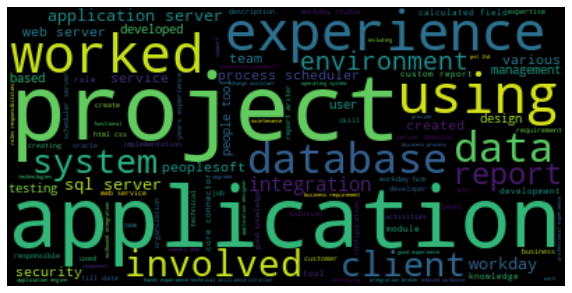

In [24]:
from wordcloud import WordCloud  #Importing the WordCloud.

#Generating the Word Cloud from the cleaned sentences.

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (df1['category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Reactjs developer                  24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: category, dtype: int64


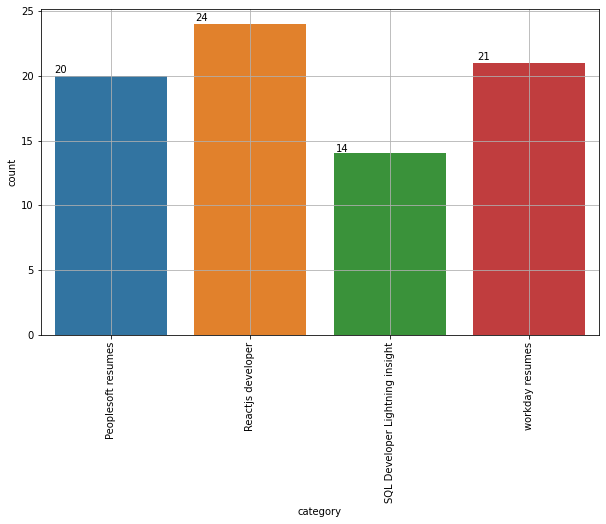

In [26]:
#Count Plot

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax=sns.countplot(x="category", data=df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [27]:
# From the above plot we can find that the highest number of resumes are from ReactJs developer
#and lowest are from SQL Developer Lighting Insight.

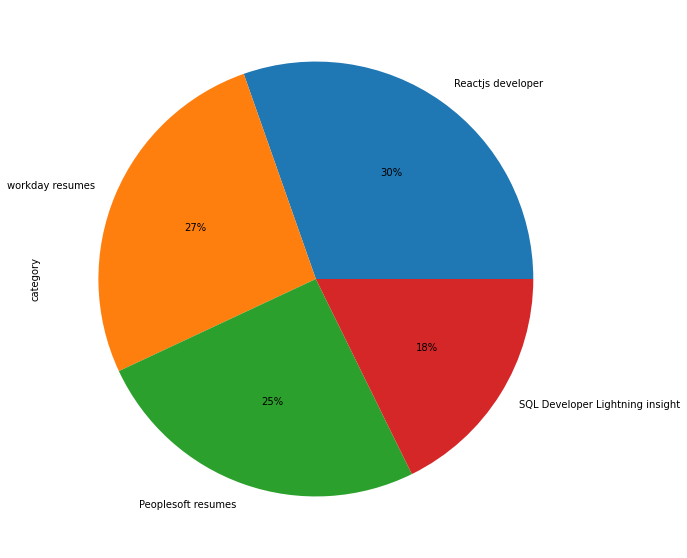

In [28]:
#Pie Chart

plt.figure(figsize=(20,10))
data['category'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [29]:
#From the above pie chart the four categories are divided as percentages out of 100%

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


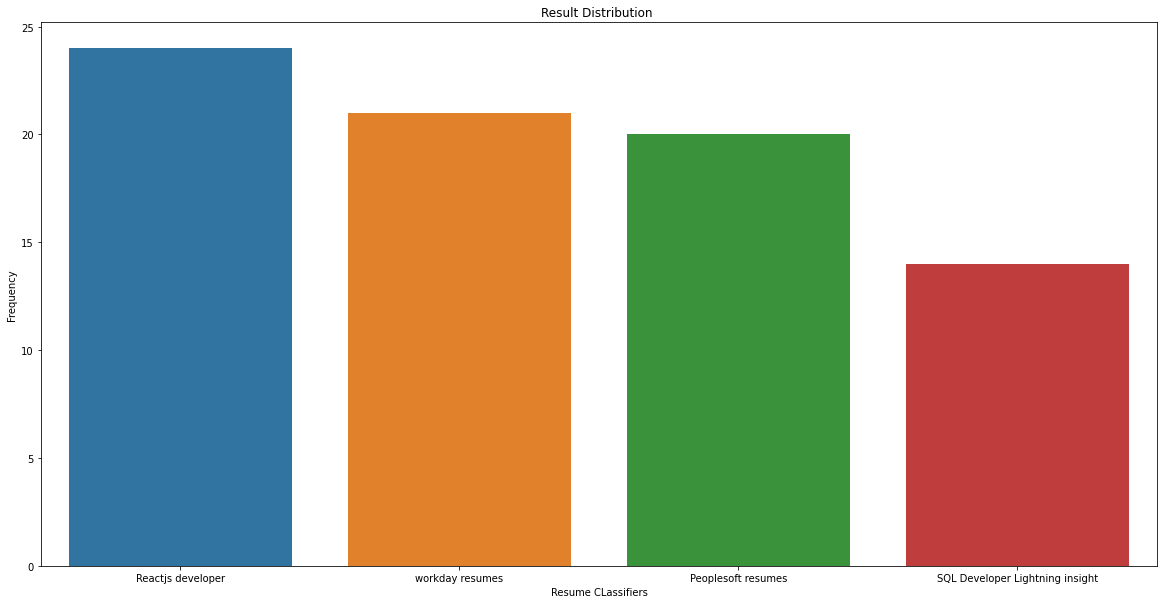

In [30]:
from six import text_type

x=data['category'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x.index,x.values)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Resume CLassifiers', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

# Encoding Category

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

In [32]:
var_mod = ['category']
le = LabelEncoder()
 
for i in var_mod:
    df1[i] = le.fit_transform(df1[i])

In [33]:
df1

,resumes,category
0,anubhav kumar singh core competencies scriptin...,0
1,ananda rayudu ananda rayudu profile summary ye...,0
2,peoplesoft database administrator gangareddy p...,0
3,classification internal classification interna...,0
4,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...
74,workday integration consultant name sri krishn...,3
75,srikanth workday hcm consultant seeking suitab...,3
76,workday hcm fcm name kumar role workday consul...,3
77,venkateswarlu workday consultant professional ...,3


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [35]:
requiredText = df1['resumes'].values
requiredTarget = df1['category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
tfidf=word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

# Train-Test Splitting

In [36]:
x_train,x_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=15, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(63, 4348)
(16, 4348)


# OnevsRest Classifier

In [37]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5) 
import sklearn.metrics as metrics

In [38]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

In [39]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 1.00


In [40]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [67]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [68]:
type(y_train)

numpy.ndarray

In [41]:
le.classes_

array(['Peoplesoft resumes', 'Reactjs developer',
       'SQL Developer Lightning insight', 'workday resumes'], dtype=object)

# Naive-Bayes Classifier

In [42]:
from sklearn.naive_bayes import MultinomialNB
Mmodel=MultinomialNB()

In [43]:
clf = OneVsRestClassifier(MultinomialNB()).fit(x_train, y_train)
prediction = clf.predict(x_test)

In [44]:
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of MultinomialNB Classifier on training set: 1.00
Accuracy of MultinomialNB Classifier on test set: 0.88


# ADA Boost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [46]:
ada = AdaBoostClassifier(n_estimators=20 ,learning_rate=0.01)

In [47]:
ABoost=ada.fit(x_train,y_train)

prediction9=ABoost.predict(x_test)
prediction10=ABoost.predict(x_train)

In [48]:
print("Accuracy of the model on train data: ", accuracy_score(y_train, prediction10))
print(classification_report(y_train, prediction10))
print(confusion_matrix(y_train, prediction10))

print("Accuracy of the model on test data: ", accuracy_score(y_test, prediction9))
print(classification_report(y_test, prediction9))
print(confusion_matrix(y_test, prediction9))

Accuracy of the model on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[17  0  0  0]
 [ 0 21  0  0]
 [ 0  0 12  0]
 [ 0  0  0 13]]
Accuracy of the model on test data:  0.75
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         8

    accuracy                           0.75        16
   macro avg       0.81      0.88      0.80        16
weighted avg       0.86      0.75      0

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred = model.predict(x_test)

In [51]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2, 1, 0, 0],
       [0, 3, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 8]], dtype=int64)

In [52]:
accuracy_score(y_test,y_pred)

0.8125

In [53]:
prediction3=model.predict(x_test)
prediction4=model.predict(x_train)

In [54]:
print("Accuracy of model on train data: ", accuracy_score(y_train, prediction4))
print(classification_report(y_train, prediction4))
print(confusion_matrix(y_train, prediction4))

print("Accuracy of model on test data: ", accuracy_score(y_test, prediction3))
print(classification_report(y_test, prediction3))
print(confusion_matrix(y_test, prediction3))

Accuracy of model on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[17  0  0  0]
 [ 0 21  0  0]
 [ 0  0 12  0]
 [ 0  0  0 13]]
Accuracy of model on test data:  0.8125
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         8

    accuracy                           0.81        16
   macro avg       0.62      0.67      0.62        16
weighted avg       0.78      0.81      0.78   

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [55]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [56]:
DC= tree.DecisionTreeClassifier(max_depth=20,criterion='gini')
DecTree=DC.fit(x_train,y_train)

In [57]:
prediction5=DecTree.predict(x_test)
prediction6=DecTree.predict(x_train)

In [58]:
print("Accuracy of model on train data: ", accuracy_score(y_train, prediction6))
print(classification_report(y_train, prediction6))
print(confusion_matrix(y_train, prediction6))

print("Accuracy of model on test data: ", accuracy_score(y_test, prediction5))
print(classification_report(y_test, prediction5))
print(confusion_matrix(y_test, prediction5))

Accuracy of model on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[17  0  0  0]
 [ 0 21  0  0]
 [ 0  0 12  0]
 [ 0  0  0 13]]
Accuracy of model on test data:  0.75
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         2
           3       1.00      0.50      0.67         8

    accuracy                           0.75        16
   macro avg       0.79      0.88      0.78        16
weighted avg       0.86      0.75      0.75     

# Random Forest Classifier

In [59]:
modelrF= RandomForestClassifier( )
modelrF.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
prediction7=modelrF.predict(x_test)
prediction8=modelrF.predict(x_train)

In [61]:
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction8))
print(classification_report(y_train, prediction8))
print(confusion_matrix(y_train, prediction8))

print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction7))
print(classification_report(y_test, prediction7))
print(confusion_matrix(y_test, prediction7))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[17  0  0  0]
 [ 0 21  0  0]
 [ 0  0 12  0]
 [ 0  0  0 13]]
ACCURACY OF THE MODEL on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.

# GradientBoosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
GBC = GradientBoostingClassifier(n_estimators=20 ,learning_rate=0.01)

In [64]:
GB=GBC.fit(x_train,y_train)

prediction11=GB.predict(x_test)
prediction12=GB.predict(x_train)

In [65]:
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction12))
print(classification_report(y_train, prediction12))
print(confusion_matrix(y_train, prediction12))

print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction11))
print(classification_report(y_test, prediction11))
print(confusion_matrix(y_test, prediction11))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[17  0  0  0]
 [ 0 21  0  0]
 [ 0  0 12  0]
 [ 0  0  0 13]]
ACCURACY OF THE MODEL on test data:  0.6875
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.60      1.00      0.75         3
           2       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         8

    accuracy                           0.69        16
   macro avg       0.78      0.75      0.69        16
weighted avg       0.83      0.69     